[Reference](https://medium.com/@Rohan_Dutt/10-algorithms-every-data-scientist-is-expected-to-know-but-interviews-expose-the-gap-cb7b66f615f2)

# 1. Federated Learning (Aggregated Algorithms)

In [12]:
import torch
import torch.nn as nn
import copy

# 1. Simple Model Architecture
class SimpleModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc = nn.Linear(10, 1)
    def forward(self, x):
        return self.fc(x)
def federated_averaging(global_model, client_models):
    """
    The core FedAvg algorithm: Average the weights of all client models
    and update the global model.
    """
    global_dict = global_model.state_dict()
    for k in global_dict.keys():
        # Stack weights from all clients and take the mean
        global_dict[k] = torch.stack([client.state_dict()[k] for client in client_models], 0).mean(0)

    global_model.load_state_dict(global_dict)
    return global_model
# 2. Setup: 1 Global Model and 3 Edge Clients
global_model = SimpleModel()
clients = [SimpleModel() for _ in range(3)]
# 3. Simulate Local Training on Edge Devices
# In reality, each client would have its own private dataset
for client in clients:
    # Initialize client with current global weights
    client.load_state_dict(global_model.state_dict())

    # Simulate a local gradient update (dummy step)
    optimizer = torch.optim.SGD(client.parameters(), lr=0.1)
    data = torch.randn(1, 10)
    target = torch.randn(1, 1)

    optimizer.zero_grad()
    output = client(data)
    loss = nn.MSELoss()(output, target)
    loss.backward()
    optimizer.step()
# 4. Global Aggregation
print("Updating Global Model via Federated Averaging...")
global_model = federated_averaging(global_model, clients)
print("Global weights updated without seeing client data.")

Updating Global Model via Federated Averaging...
Global weights updated without seeing client data.


# 2. Gaussian Processes (GP)

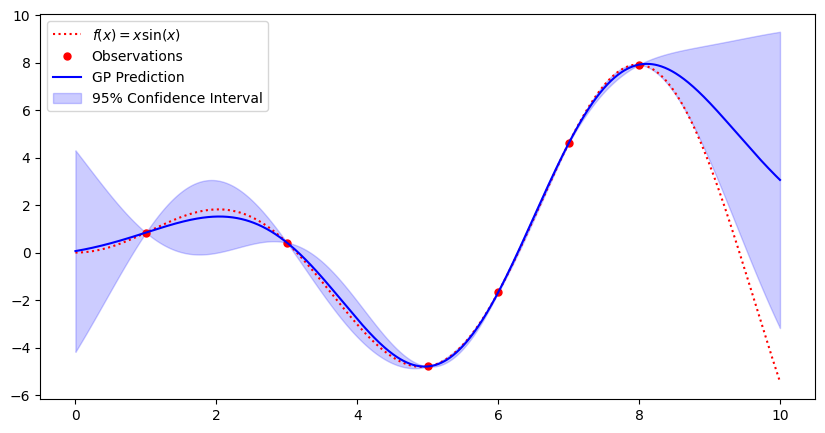

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# 1. Define a "true" function we want to learn (e.g., a sine wave)
def f(x):
    return x * np.sin(x)
# 2. Generate training data with some noise
X = np.atleast_2d([1., 3., 5., 6., 7., 8.]).T
y = f(X).ravel()
# 3. Define Kernel (Radial Basis Function + Constant term)
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
# 4. Initialize and Fit
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
gp.fit(X, y)
# 5. Predict across a continuous range
x_pred = np.atleast_2d(np.linspace(0, 10, 1000)).T
y_pred, sigma = gp.predict(x_pred, return_std=True)
# 6. Visualization
plt.figure(figsize=(10, 5))
plt.plot(x_pred, f(x_pred), 'r:', label=r'$f(x) = x \sin(x)$') # Ground truth
plt.plot(X, y, 'r.', markersize=10, label='Observations')      # Data points
plt.plot(x_pred, y_pred, 'b-', label='GP Prediction')          # Mean
plt.fill_between(x_pred.ravel(), y_pred - 1.96 * sigma,
                 y_pred + 1.96 * sigma, alpha=0.2, color='blue',
                 label='95% Confidence Interval')
plt.legend()
plt.show()

# 3. Proximal Policy Optimization (PPO)

In [9]:
!pip install stable_baselines3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.0/188.0 kB 2.1 MB/s eta 0:00:00


In [10]:
import gymnasium as gym
from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env

# 1. Initialize the environment
# We'll use CartPole: a classic RL balancing task
env = make_vec_env("CartPole-v1", n_envs=4)
# 2. Define the PPO Model
# MlpPolicy: Multi-layer Perceptron (standard for non-image data)
# verbose=1: Allows us to monitor the 'explained_variance' and 'entropy_loss'
model = PPO(
    policy="MlpPolicy",
    env=env,
    learning_rate=3e-4,
    n_steps=2048,
    batch_size=64,
    n_epochs=10,
    gamma=0.99,
    verbose=1
)
# 3. Train the Agent
print("Training the PPO agent...")
model.learn(total_timesteps=10000)
# 4. Save and Test
model.save("ppo_cartpole")
obs = env.reset()
for _ in range(1000):
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, done, info = env.step(action)
    # env.render() # Uncomment to see the agent in action

Gym has been unmaintained since 2022 and does not support NumPy 2.0 amongst other critical functionality.
Please upgrade to Gymnasium, the maintained drop-in replacement of Gym, or contact the authors of your software and request that they upgrade.
See the migration guide at https://gymnasium.farama.org/introduction/migration_guide/ for additional information.


Using cpu device
Training the PPO agent...


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.4     |
|    ep_rew_mean     | 23.4     |
| time/              |          |
|    fps             | 3095     |
|    iterations      | 1        |
|    time_elapsed    | 2        |
|    total_timesteps | 8192     |
---------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 36           |
|    ep_rew_mean          | 36           |
| time/                   |              |
|    fps                  | 881          |
|    iterations           | 2            |
|    time_elapsed         | 18           |
|    total_timesteps      | 16384        |
| train/                  |              |
|    approx_kl            | 0.0145294685 |
|    clip_fraction        | 0.212        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.681       |
|    explained_variance   | 0.000654     |
|    learning_r

# 4. UMAP (Uniform Manifold Approximation and Projection)

In [ ]:
import umap
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load high-dimensional data (64 dimensions)
digits = load_digits()
X, y = digits.data, digits.target
# 2. Initialize and fit UMAP
# n_neighbors: Controls balance between local vs global structure
# min_dist: Controls how tightly points are packed together
reducer = umap.UMAP(
    n_neighbors=15,
    min_dist=0.1,
    n_components=2,
    random_state=42
)
# 3. Transform the data to 2D
embedding = reducer.fit_transform(X)
# 4. Visualize the Result
plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=y,
    cmap='Spectral',
    s=5
)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(scatter, boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of the Digits dataset', fontsize=16)
plt.show()

# 5. Isolation Forests

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# 1. Generate synthetic data (Normal clusters + Outliers)
rng = np.random.RandomState(42)
X_normal = 0.3 * rng.randn(100, 2)
X_outliers = rng.uniform(low=-4, high=4, size=(20, 2))
X = np.concatenate([X_normal, X_outliers], axis=0)
# 2. Fit the Isolation Forest
# contamination: the expected proportion of outliers in the data
clf = IsolationForest(n_estimators=100, contamination=0.15, random_state=42)
clf.fit(X)
# 3. Predict anomaly scores
# -1 indicates an anomaly, 1 indicates a normal point
y_pred = clf.predict(X)
scores = clf.decision_function(X) # Lower scores = more anomalous
# 4. Visualize the Isolation Regions
xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.title("Isolation Forest Anomaly Detection")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='RdYlGn', edgecolors='k')
plt.colorbar(label='Anomaly Score')
plt.show()

# 6. SHAP (SHapley Additive exPlanations)

In [7]:
import shap
import xgboost as xgb
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

# 1. Load data and train a model
data = fetch_california_housing()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = xgb.XGBRegressor(n_estimators=100).fit(X_train, y_train)
# 2. Initialize the SHAP Explainer
# TreeExplainer is optimized specifically for ensemble tree models
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
# 3. Visualize a single prediction (Local Explanation)
# This shows how each feature pushed the price up or down from the base value
print(f"Base Value (Average Prediction): {explainer.expected_value}")
shap.initjs()
# To display in a notebook: shap.force_plot(explainer.expected_value, shap_values[0,:], X_test[0,:], feature_names=data.feature_names)
# 4. Global Explanation: Summary Plot
# Provides a high-level overview of which features drive the model most
shap.summary_plot(shap_values, X_test, feature_names=data.feature_names)

/usr/local/lib/python3.12/dist-packages/sklearn/datasets/_base.py:1519: UserWarning: Retry downloading from url: https://ndownloader.figshare.com/files/5976036
  warnings.warn(f"Retry downloading from url: {remote.url}")


HTTPError: HTTP Error 403: Forbidden

# 7. Diffusion Models

In [6]:
import torch
import torch.nn as nn
from diffusers import UNet2DModel, DDPMScheduler
from PIL import Image
import numpy as np

# 1. Initialize a Pre-trained Noise Scheduler (DDPM)
# The scheduler defines how much noise is added at each step
scheduler = DDPMScheduler(num_train_timesteps=1000)
# 2. Setup a U-Net Model
# The U-Net predicts the noise that was added to an image
model = UNet2DModel(
    sample_size=64,
    in_channels=3,
    out_channels=3,
    layers_per_block=2,
    block_out_channels=(64, 128, 256),
    down_block_types=("DownBlock2D", "AttnDownBlock2D", "DownBlock2D"),
    up_block_types=("UpBlock2D", "AttnUpBlock2D", "UpBlock2D"),
)
# 3. The Core Concept: Predicting Noise
def denoise_step(noisy_image, model, scheduler, timestep):
    # Predict noise residual
    with torch.no_grad():
        noise_pred = model(noisy_image, timestep).sample

    # Compute the "less noisy" image (previous step)
    prev_noisy_sample = scheduler.step(noise_pred, timestep, noisy_image).prev_sample
    return prev_noisy_sample
# Mock setup: 1 random noisy image batch
noisy_img = torch.randn((1, 3, 64, 64))
t = torch.tensor([500]) # Mid-way through the diffusion process
# One step of the reverse diffusion process
cleaned_img = denoise_step(noisy_img, model, scheduler, t)
print(f"Input shape: {noisy_img.shape}")
print(f"Denoised output shape: {cleaned_img.shape}")

/usr/local/lib/python3.12/dist-packages/torch/amp/autocast_mode.py:270: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.


Input shape: torch.Size([1, 3, 64, 64])
Denoised output shape: torch.Size([1, 3, 64, 64])


# 8. Graph Neural Networks (GNNs)

In [4]:
!pip install torch_geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 13.7 MB/s eta 0:00:00


In [5]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.datasets import Planetoid

# 1. Load the Cora dataset (a citation network)
dataset = Planetoid(root='/tmp/Cora', name='Cora')
data = dataset[0]
class GCN(torch.nn.Module):
    def __init__(self, hidden_channels):
        super(GCN, self).__init__()
        # First Graph Convolution: Aggregates neighbor info
        self.conv1 = GCNConv(dataset.num_node_features, hidden_channels)
        # Second Graph Convolution: Refines the representation
        self.conv2 = GCNConv(hidden_channels, dataset.num_classes)
    def forward(self, x, edge_index):
        # x: Node features, edge_index: Graph connectivity (COO format)
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.conv2(x, edge_index)
        return x
# 2. Initialize Model, Optimizer, and Loss
model = GCN(hidden_channels=16)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
criterion = torch.nn.CrossEntropyLoss()
# 3. Training Loop (Simplified)
model.train()
for epoch in range(200):
    optimizer.zero_grad()
    out = model(data.x, data.edge_index)
    loss = criterion(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
    if epoch % 50 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item():.4f}')
# 4. Evaluation
model.eval()
pred = model(data.x, data.edge_index).argmax(dim=1)
correct = (pred[data.test_mask] == data.y[data.test_mask]).sum()
acc = int(correct) / int(data.test_mask.sum())
print(f'Accuracy: {acc:.4f}')

Processing...
Done!


Epoch 0, Loss: 1.9333
Epoch 50, Loss: 0.0521
Epoch 100, Loss: 0.0237
Epoch 150, Loss: 0.0295
Accuracy: 0.8110


# 9. XGBoost / LightGBM / CatBoost (Gradient Boosting)

In [2]:
import xgboost as xgb
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# 1. Setup Synthetic Tabular Data
X, y = make_classification(n_samples=10000, n_features=20, n_informative=15, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 2. XGBoost with Advanced Hyperparameters
# tree_method='hist' enables histogram-based learning (similar to LightGBM)
# scale_pos_weight is useful for imbalanced classes
clf = xgb.XGBClassifier(
    n_estimators=500,
    max_depth=6,
    learning_rate=0.05,
    tree_method='hist',  # Fast histogram optimized training
    device="cuda",       # Use "cpu" if no GPU available
    reg_lambda=1,        # L2 Regularization
    reg_alpha=0.5,       # L1 Regularization
    early_stopping_rounds=10,
    eval_metric="logloss"
)
# 3. Fit with Early Stopping to prevent overfitting
clf.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    verbose=False
)
# 4. Predict and Evaluate
preds = clf.predict(X_test)
print(f"XGBoost Accuracy: {accuracy_score(y_test, preds):.4f}")
print(f"Best Iteration: {clf.get_booster().best_iteration}")

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [14:26:50] WARNING: /workspace/src/context.cc:53: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()
/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [14:26:50] WARNING: /workspace/src/context.cc:207: Device is changed from GPU to CPU as we couldn't find any available GPU on the system.
  self.starting_round = model.num_boosted_rounds()


XGBoost Accuracy: 0.9565
Best Iteration: 499


# 10. Transformers (Self-Attention Mechanism)

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class SelfAttention(nn.Module):
    def __init__(self, embed_size, heads):
        super(SelfAttention, self).__init__()
        self.embed_size = embed_size
        self.heads = heads
        self.head_dim = embed_size // heads
        assert (self.head_dim * heads == embed_size), "Embed size must be divisible by heads"
        # Linear transformations for Query, Key, and Value
        self.values = nn.Linear(self.head_dim, self.head_dim, bias=False)
        self.keys = nn.Linear(self.head_dim, self.head_dim, bias=False)
        self.queries = nn.Linear(self.head_dim, self.head_dim, bias=False)
        self.fc_out = nn.Linear(heads * self.head_dim, embed_size)
    def forward(self, values, keys, queries, mask=None):
        N = queries.shape[0] # Batch size
        value_len, key_len, query_len = values.shape[1], keys.shape[1], queries.shape[1]
        # Split embedding into self.heads pieces
        values = values.reshape(N, value_len, self.heads, self.head_dim)
        keys = keys.reshape(N, key_len, self.heads, self.head_dim)
        queries = queries.reshape(N, query_len, self.heads, self.head_dim)
        # Scaled Dot-Product Attention
        # energy shape: (N, heads, query_len, key_len)
        energy = torch.einsum("nqhd,nkhd->nhqk", [queries, keys])

        if mask is not None:
            energy = energy.masked_fill(mask == 0, float("-1e20"))
        # Scale and Softmax
        attention = torch.softmax(energy / (self.embed_size ** (1/2)), dim=3)
        # Multiply attention weights by values
        out = torch.einsum("nhql,nlhd->nqhd", [attention, values]).reshape(
            N, query_len, self.heads * self.head_dim
        )
        return self.fc_out(out)
# Quick Test
dim, h = 256, 8
model = SelfAttention(dim, h)
x = torch.randn((1, 10, dim)) # (Batch, Seq_len, Embed_dim)
output = model(x, x, x)
print(f"Output Shape: {output.shape}") # Expected: [1, 10, 256]

Output Shape: torch.Size([1, 10, 256])
